<a href="https://colab.research.google.com/github/AnwHus007/NLP/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.3 MB/s eta 0:00:00


In [2]:
from gensim.models import Word2Vec
sentences = [["cat", "dog", "pet"], ["car", "bike", "vehicle"]]
model = Word2Vec(sentences, min_count=1)
print(model.wv.similarity('cat', 'dog'))
print(model.wv.similarity('car', 'bike'))

0.13887982
-0.02367166


In [3]:
import numpy as np

vocab = list(model.wv.key_to_index)
similarity_matrix = np.zeros((len(vocab), len(vocab)))

for i, word1 in enumerate(vocab):
  for j, word2 in enumerate(vocab):
    similarity_matrix[i, j] = model.wv.similarity(word1, word2)

print(similarity_matrix)


[[ 1.         -0.01083918 -0.05234674 -0.11167058 -0.02775037 -0.0598763 ]
 [-0.01083918  0.99999994 -0.02367166  0.06797595  0.00450302  0.00939116]
 [-0.05234674 -0.02367166  0.99999994 -0.01351493  0.17018887  0.0640898 ]
 [-0.11167058  0.06797595 -0.01351493  1.         -0.0446171   0.13149002]
 [-0.02775037  0.00450302  0.17018887 -0.0446171   1.          0.13887982]
 [-0.0598763   0.00939116  0.0640898   0.13149002  0.13887982  1.        ]]


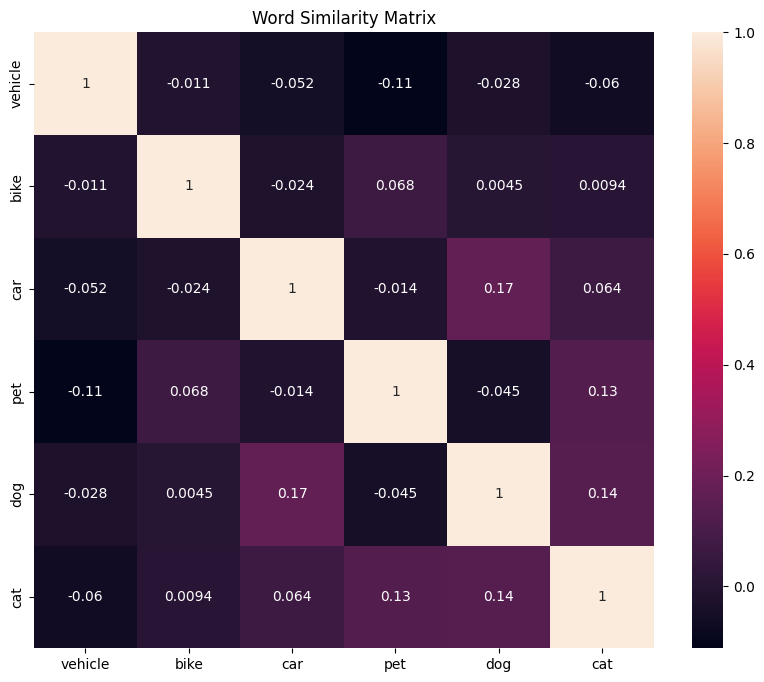

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, xticklabels=vocab, yticklabels=vocab)
plt.title('Word Similarity Matrix')
plt.show()

###From the heatmap, we can infer:
###Words that are semantically similar (like 'cat' and 'dog', or 'car' and 'bike') have higher similarity scores (closer to 1).
###Words that are not semantically related have lower similarity scores (closer to 0).
###This visualization helps to understand the relationships between words as captured by the Word2Vec model.